In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
df = pd.read_csv ("/content/drive/My Drive/youtube_comments.csv", lineterminator='\n')
df

,comments,name,time,likes
0,늘 영상만 보다가 처음 댓글 남겨요~^^ 큐앤에이 보니까 더 정감가고 친근하네요 다...,맨사언니,2021-04-04T14:15:48Z,1
1,"Hi eonni, give english subtitles please🙇",anggi naberia,2021-03-16T22:58:45Z,0
2,강아지 오둥이들 키우는 개아범 입니다 ~~~ 항상 유튜브 보면서 힐링하고 있어요~~...,설랜드네 티브이,2021-03-15T19:46:06Z,1
3,라이브못봐서 영상 기다렸어요,조서현,2021-03-13T08:59:54Z,1
4,공대생이셨다니 멋져요😍 다음 라이브는 꼭 시간 맞춰올게요 ㅋㅋ 아숩지뭐에요 ㅜㅜ,Hobby choi game-log,2021-03-09T15:01:15Z,0
...,...,...,...,...
6289,도어알람귀여워요🥰 알콩달콩,박은경,2019-12-19T07:49:07Z,1
6290,"오, 세상 참 좋아졌네요 ㅎㅎ<br>스마트한 집이라니..",드림크루의 Hotspot,2019-12-19T05:06:38Z,2
6291,집이 너무 예뻐요~!! 조명 덕분에 더 분위기 있어 보이네요💕,예정효,2019-12-19T05:02:05Z,2
6292,스마트홈이 어려워보였었는데 굉장히 쉽게 사용하는 모습을 보니 한 번 해보고 싶어지네요!,김대원,2019-12-19T04:32:38Z,0


**길이 분포**

In [15]:
train_length = df['comments'].astype(str).apply(len)
train_length.head()

0     51
1     40
2    133
3     15
4     44
Name: comments, dtype: int64

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

Text(0, 0.5, 'Number of comments')

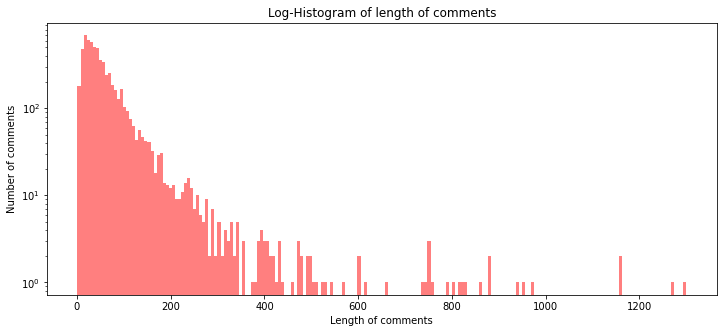

In [20]:
# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값에 대한 버킷 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of comments')
# 그래프 x축 라벨
plt.xlabel('Length of comments')
# 그래프 y축 라벨
plt.ylabel('Number of comments')

In [24]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 돼 있음
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 1300
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 61.63
리뷰 길이 표준편차: 78.54
리뷰 길이 중간값: 41.0
리뷰 길이 제1사분위: 23.0
리뷰 길이 제3사분위: 73.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fe5ac71cad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe5ac72dbd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe5ac3d4450>],
 'means': [<matplotlib.lines.Line2D at 0x7fe5ac3d6090>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe5ac3d6710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe5ac409910>,
  <matplotlib.lines.Line2D at 0x7fe5ac4094d0>]}

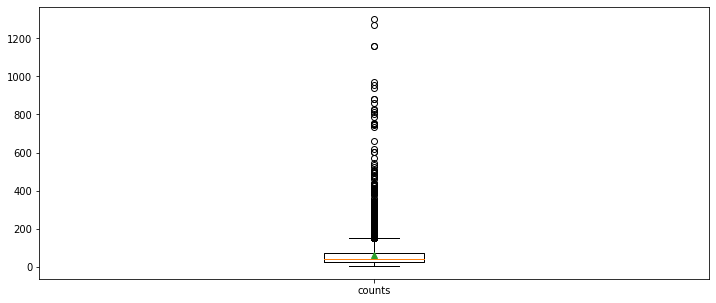

In [26]:
plt.figure(figsize=(12, 5))
# 박스 플롯 생성
# 첫 번째 파라미터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length, labels=['counts'], showmeans=True)

In [28]:
train_length[train_length>200]

118     240
176     297
178     225
263     229
267     432
       ... 
6042    827
6129    545
6155    336
6190    256
6192    222
Name: comments, Length: 227, dtype: int64

**wordcloud**

In [29]:
train_review = [review for review in df['comments'] if type(review) is str]

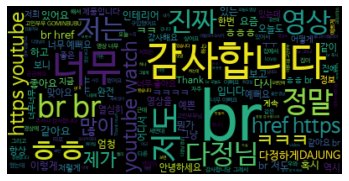

In [38]:
wordcloud = WordCloud(font_path=DATA_IN_PATH+'NanumGothic.ttf').generate(' '.join(train_review))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**명사 추출 후 wordcloud**

In [42]:
pip install customized_konlpy

     |████████████████████████████████| 890kB 12.6MB/s 
     |████████████████████████████████| 450kB 26.8MB/s 
     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 9.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [43]:
from ckonlpy.tag import Twitter
twitter = Twitter()
print(twitter.pos('브이로그'))

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('브이', 'Noun'), ('로그', 'Noun')]


In [44]:
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.add_dictionary('브이로그', 'Noun')

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [45]:
#word2vec
vec = []
for comment in df['comments']:
    vec2 = []
    tm_ls = twitter.nouns(comment)
    for word in tm_ls: #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
        if len(word) > 1:
            vec2.append(word)
    vec.append(vec2)

In [46]:
noun_list = []
for i in vec:
  noun_list.extend(i)

In [48]:
from collections import Counter

# 빈도수 계산
count = Counter(noun_list)

# 상위 30건 추출
print(count.most_common(30))

# 상위 100건 추출
most = count.most_common(100)

# 딕셔너리 구성
tags = {}
for n, c in most:
  tags[n] = c

[('어요', 1710), ('영상', 1226), ('감사', 1118), ('다정', 840), ('보고', 547), ('정말', 351), ('구입', 349), ('오늘', 321), ('제품', 312), ('진짜', 304), ('고민', 301), ('어서', 272), ('부부', 272), ('어디', 258), ('정보', 258), ('인테리어', 232), ('저희', 225), ('면서', 214), ('생각', 197), ('혹시', 190), ('하나', 186), ('정리', 184), ('구독', 169), ('자주', 168), ('요즘', 161), ('느낌', 161), ('행복', 149), ('가요', 142), ('댓글', 140), ('해주', 139)]


<Figure size 432x288 with 0 Axes>

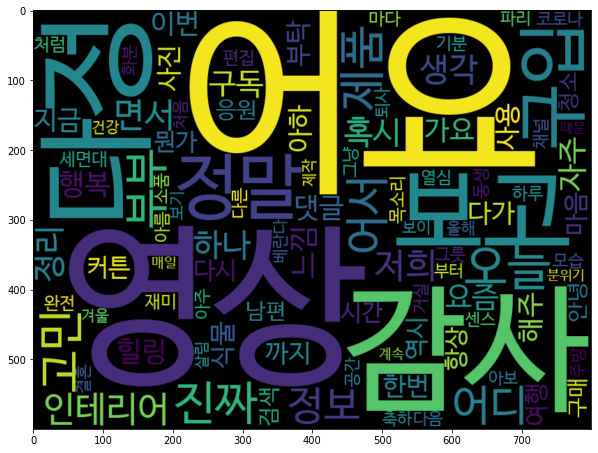

In [49]:
wc = WordCloud(font_path=DATA_IN_PATH+'NanumGothic.ttf', width=800, height=600)
gen = wc.generate_from_frequencies(tags)
plt.figure()
plt.figure(figsize=(10, 8))
plt.imshow(gen, interpolation='bilinear')

<Figure size 432x288 with 0 Axes>

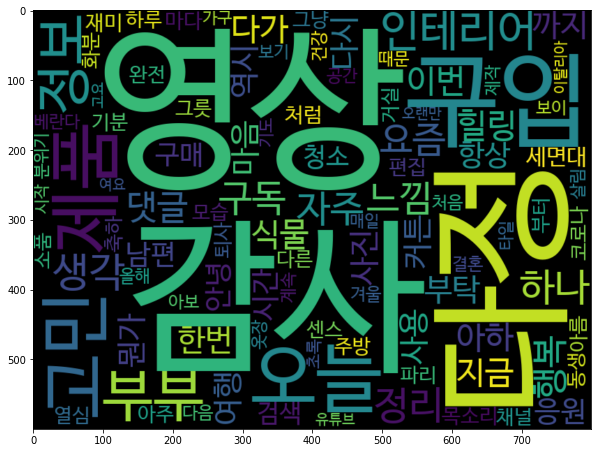

In [53]:
stopwords = ['어요','보고','정말','진짜','어서','어디','저희','면서','혹시','가요','해주']

count = Counter(noun_list)
most = count.most_common(100)

tags = {}
for n, c in most:
  if n not in stopwords:
    tags[n] = c

wc = WordCloud(font_path=DATA_IN_PATH+'NanumGothic.ttf', width=800, height=600)
gen = wc.generate_from_frequencies(tags)
plt.figure()
plt.figure(figsize=(10, 8))
plt.imshow(gen, interpolation='bilinear')

**네이버 맞춤법 검사기**

In [10]:
!git clone https://github.com/ssut/py-hanspell.git # 네이버 맞춤법 검사기

Cloning into 'py-hanspell'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 101 (delta 5), reused 10 (delta 3), pack-reused 81
Receiving objects: 100% (101/101), 25.27 KiB | 5.05 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [11]:
cd py-hanspell/

/content/py-hanspell


In [12]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:694: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating py_hanspell.egg-info
writing py_hanspell.egg-info/PKG-INFO
writing dependency_links to py_hanspell.egg-info/dependency_links.txt
writing requirements to py_hanspell.egg-info/requires.txt
writing top-level names to py_hanspell.egg-info/top_level.txt
writing manifest file 'py_hanspell.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'py_hanspell.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/hanspell
copying hanspell/response.py -> build/lib/hanspell
copying hanspell/__init__.py -> build/lib/hanspell
copying hanspell/constants.py -> build/lib/h

In [41]:
from hanspell import spell_checker

text = '제 쳬널 와서 20마눤 얻어가세요 선착순이니까 지금 서둘러오세용'
spell_checker.check(text).checked

'제 쳬널 와서 20마눤 얻어 가세요 선착순이니까 지금 서둘러 오세요'